In [18]:
from numpy import sin, cos, exp, pi
from numpy.linalg import norm
from scipy.constants import c
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from time import sleep
from IPython.display import HTML

In [19]:
# generate theta array
samples = 500
resolution_theta = 2 * pi / samples

theta = np.arange(-pi, pi, resolution_theta)
frequency = 915 * (10**6)                                       # 915 MHz
wavelength = c / frequency

# -- Steer with just one angle --
# steering_angle = 60                                          
# w = steering_angle * 2 * pi / 360

# -- Steer with series of angles --
num_steering_angles = 10
steering_angles_deg = np.arange(90, 190, num_steering_angles)   # steer for 10 different angles between horizon (90) and 
                                                                #pointing down vertically (180)                    
steering_angles_rad = steering_angles_deg * 2 * pi / 360

d = wavelength / 2                                              # element spacing
N = 4                                                           # num elements
k = (2* pi) / wavelength                                        # wavenumber    

In [20]:
def compute_pattern(w):                                         # Fourier Transform - beamformer equation
    output = [0.0] * samples
    for angle in range(0, len(theta)):
        sum_u = 0.0
        normalized = 0.0
        for i in range(0, N):
            sum_u += exp(-(k * i * d * (sin(theta[angle]) - cos(w)))*1j)

        normalized = (1 / N) * abs(sum_u)**2
        output[angle] = normalized
        
    return output

    

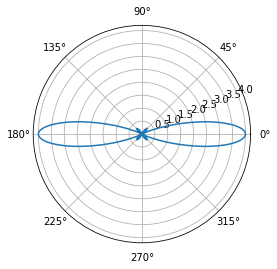

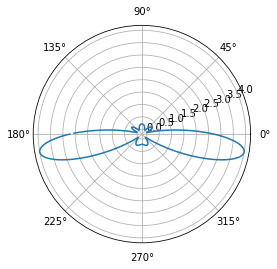

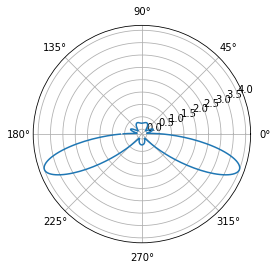

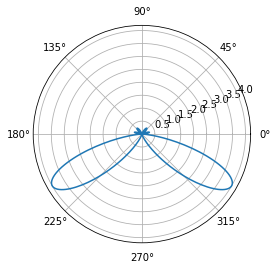

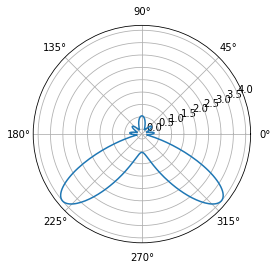

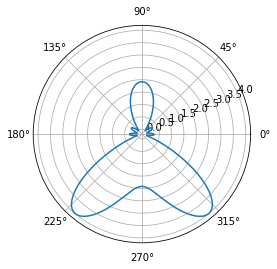

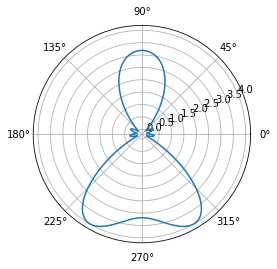

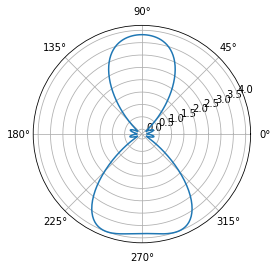

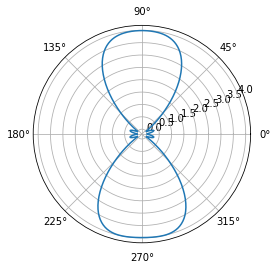

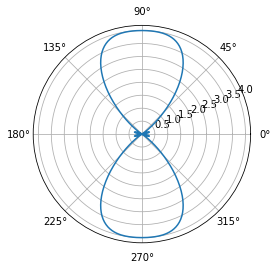

In [21]:
for ang in range(0, len(steering_angles_rad)):
    fig = plt.figure()                                       # plot individual patterns on diff figures
    pattern = compute_pattern(steering_angles_rad[ang])
    plt.polar(theta, pattern)                                  # plot all patterns on one figure

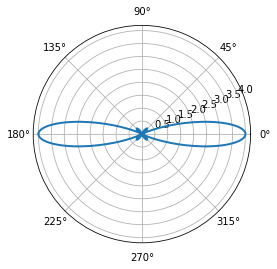

In [22]:
fig = plt.figure()
ax = plt.subplot(polar = 'True')
ax.set_ylim([0,4])
ax.set_ylim([0,4])
line, = plt.polar([], [], lw = 2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    plt.clf()
    x = theta
    y = compute_pattern(steering_angles_rad[i])
    return plt.polar(x, y, lw = 2)

# create animation
myAnimation = animation.FuncAnimation(fig, animate,
                               frames=np.arange(0,len(steering_angles_rad)), interval=200, blit=False, repeat=True)

vid = myAnimation.to_html5_video()
HTML(vid)